# lets parsing 

In [1]:
# Import libraries
import requests
import re # regular expressions
from bs4 import BeautifulSoup
from selenium import webdriver
import pandas as pd
import numpy as np
import unidecode
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.by import By
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.action_chains import ActionChains
from selenium.common.exceptions import TimeoutException
from selenium.common.exceptions import NoSuchElementException
from tqdm import tqdm
from time import sleep

In [2]:
from selenium.webdriver import Chrome
from selenium.webdriver.common. keys import Keys
from selenium.webdriver.support.ui import WebDriverWait as wait
from selenium. webdriver.support import expected_conditions as EC
from selenium. common.exceptions import NoSuchElementException
from selenium import webdriver
from bs4 import BeautifulSoup
from time import sleep
from tqdm import tqdm
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.common.action_chains import ActionChains  # Импорт для ActionChains


In [2]:
browser=webdriver.Chrome()

In [21]:
url='https://krisha.kz/arenda/kvartiry/?rent-period-switch=%2Farenda%2Fkvartiry'

In [6]:
browser.get(url)

In [7]:
content = browser.page_source
soup = BeautifulSoup(content)
soup

<html class=""><head>
<meta charset="utf-8"/>
<meta content="ie=edge" http-equiv="x-ua-compatible"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<title>Аренда квартир помесячно в Алматы: сдать, снять квартиру  – объявления на Крыше</title>
<meta content="«Крыша» – крупнейшая база бесплатных объявлений по ⭐ помесячной аренде недвижимости ⭐ в Алматы. Здесь можно снять и сдать недвижимость в любом городе Казахстана. Ежедневное обновление!" name="description"/>
<link href="https://krisha.kz/arenda/kvartiry/almaty/" hreflang="ru" rel="alternate"/>
<link href="https://krisha.kz/kz/arenda/kvartiry/almaty/" hreflang="kz" rel="alternate"/>
<link href="https://krisha.kz/arenda/kvartiry/almaty/" rel="canonical"/>
<link href="https://m.krisha.kz/arenda/kvartiry/almaty/" media="only screen and (max-width: 640px)" rel="alternate"/>
<link href="//krisha.kz/static/frontend/favicons/favicon.ico?v2" rel="icon" type="image/x-icon"/>
<link href="//krisha.kz/static/frontend/favico

In [24]:
main=browser.find_element(By.CLASS_NAME,"a-card__header-left")
main.text

'2-комнатная квартира, 54.5 м², 10/12 этаж помесячно'

In [25]:
price=browser.find_element(By.CLASS_NAME,"a-card__price")
price.text

'290 000 〒'

In [26]:
loca=browser.find_element(By.CLASS_NAME,"a-card__subtitle")
loca.text

'Каратауский р-н, мкр Нурсат, Назарбекова 29/2 — Шаяхметов'

In [27]:
inf=browser.find_element(By.CLASS_NAME,"a-card__text-preview")
inf.text

'жил. комплекс Otau city, меблирована полностью, Сдаём квартиру чистую со всеми удобствами звонить до 22.00 есть депозит'

In [28]:
browser.find_element(By.CLASS_NAME,'paginator__btn').click()

In [12]:
def clickNextPageButton():
    rightButton = browser.find_element(By.CLASS_NAME, 'paginator__btn-text')
    if rightButton == None:
        return
    ActionChains(browser).click(rightButton).perform()

In [13]:
content_before = browser.page_source
clickNextPageButton()
content_after = browser.page_source

if content_before != content_after:
    print("Перешел на следующую страницу")
else:
    print("Остался на той же странице")


Перешел на следующую страницу


In [37]:
len(browser.find_elements(By.CLASS_NAME, 'a-card__header'))

20

In [51]:
for item in data[:5]:  
    print(item)

['3-комнатная квартира, 70 м², 5/5 этаж помесячно', '430 000 〒', 'Бостандыкский р-н, Назарбаева 189/1 — Сатпаева', 'меблирована полностью, Сдается 3-х комнатная квартира в самом центре города! Квартира оснащена всей необходимой мебелью и техникой для комфортного проживания. Кондиционеры установлены в гостиной и мастер спальне, в детской установлен диван и рабочий стол. Большое количество мест для хранения. Отлич…']
['2-комнатная квартира, 50 м², 2/3 этаж помесячно', '450 000 〒', 'Алмалинский р-н, Жамбыла 59 — Абылай хана', 'меблирована полностью']
['2-комнатная квартира, 55 м², 4/12 этаж помесячно', '330 000 〒', 'Алмалинский р-н, Карасай батыра 119/95 — Ади Шарипова', 'жил. комплекс Qarasai Park, меблирована полностью']
['3-комнатная квартира, 64 м², 2/20 этаж помесячно', '500 000 〒', 'Бостандыкский р-н, Гагарина 310 — Кожабекова', 'жил. комплекс Комфорт Сити, Сдам квартиру евротрешку на длительный срок']
['5-комнатная квартира, 170 м², 2/3 этаж помесячно', '800 000 〒', 'Алмалинский р-

In [14]:
import re
from selenium import webdriver
from bs4 import BeautifulSoup
from time import sleep

# Функция для очистки текста
def clean_text(text):
    return text.strip().replace('\n', '').replace('\xa0', ' ').strip()

# Функция для извлечения числового значения из строки цены
def extract_price(price_text):
    match = re.search(r'\d+', price_text.replace(' ', ''))
    return int(match.group()) if match else None

df = pd.DataFrame(columns=['main', 'price', 'Price', 'Location', 'Issue Date'])
# Инициализация браузера
browser = webdriver.Chrome()
url = 'https://krisha.kz/arenda/kvartiry/almaty/'
browser.get(url)

sleep(3)

# Цикл по страницам
for p in range(3):
    soup = BeautifulSoup(browser.page_source, 'lxml')
    orgs = soup.findAll('div', class_='a-card__header')

    # Обрабатываем каждый блок информации
    for org in orgs:
        main = clean_text(org.find("div", class_="a-card__header-left").text) 
        price = clean_text(org.find("div", class_="a-card__price").text)
        price_num = extract_price(price)  # Извлекаем числовое значение цены
        loca = clean_text(org.find("div", class_="a-card__subtitle").text)
        inf = clean_text(org.find('div', class_="a-card__text-preview").text)

        # Добавляем данные в список
        data.append([main, price, price_num, loca, inf])
    
    print(f"Page {p+1}: {len(data)} entries scraped.")
    clickNextPageButton()
    sleep(3)

# Выводим количество собранных данных
print(f"Total data collected: {len(data)}")


Page 1: 23 entries scraped.
Page 2: 43 entries scraped.
Page 3: 63 entries scraped.
Total data collected: 63


In [22]:
from selenium import webdriver
from selenium.webdriver.common.action_chains import ActionChains
from bs4 import BeautifulSoup
from time import sleep
import pandas as pd
import re

# Инициализируем пустой DataFrame с нужными колонками
df = pd.DataFrame(columns=['main', 'price', 'loca', 'inf'])

# Функция для очистки текста
def clean_text(text):
    return text.strip().replace('\n', '').replace('\xa0', ' ').strip()

# Запускаем браузер и переходим на сайт
browser = webdriver.Chrome()
url = 'https://krisha.kz/arenda/kvartiry/almaty/'
browser.get(url)
sleep(3)

# Цикл по страницам
for p in range(300):
    soup = BeautifulSoup(browser.page_source, 'lxml')
    orgs = soup.findAll('div', class_='a-card__header')
    
    # Список для хранения данных текущей страницы
    page_data = []
    
    # Сбор данных из карточек
    for org in orgs:
        main = clean_text(org.find("div", class_="a-card__header-left").text)
        price = clean_text(org.find("div", class_="a-card__price").text)
        loca = clean_text(org.find("div", class_="a-card__subtitle").text)
        inf = clean_text(org.find('div', class_="a-card__text-preview").text)
        
        # Извлекаем только числа из цены и добавляем к данным
        price_numeric = re.findall(r'\d+', price.replace(' ', ''))  # убираем пробелы и извлекаем только цифры
        price_numeric = int("".join(price_numeric)) if price_numeric else None
        
        # Добавляем данные в список
        page_data.append([main, price_numeric, loca, inf])
    
    # Создаем временный DataFrame для текущей страницы и добавляем в основной df
    temp_df = pd.DataFrame(page_data, columns=['main', 'price', 'loca', 'inf'])
    df = pd.concat([df, temp_df], ignore_index=True)
    
    print(f"Собрано данных: {len(df)} записей")

    # Переход на следующую страницу
    # Должна быть функция или действие для нажатия кнопки "Следующая страница"
    # clickNextPageButton()  # раскомментируйте, если функция уже реализована
    clickNextPageButton()
    sleep(10)
    
# Просмотр финального DataFrame
print(df.head())


Собрано данных: 23 записей
Собрано данных: 43 записей
Собрано данных: 63 записей
Собрано данных: 83 записей
Собрано данных: 103 записей
Собрано данных: 123 записей
Собрано данных: 143 записей
Собрано данных: 163 записей
Собрано данных: 183 записей
Собрано данных: 203 записей
Собрано данных: 223 записей
Собрано данных: 243 записей
Собрано данных: 263 записей
Собрано данных: 283 записей
Собрано данных: 303 записей
Собрано данных: 323 записей
Собрано данных: 343 записей
Собрано данных: 363 записей
Собрано данных: 383 записей
Собрано данных: 403 записей
Собрано данных: 423 записей
Собрано данных: 443 записей
Собрано данных: 463 записей
Собрано данных: 483 записей
Собрано данных: 503 записей
Собрано данных: 523 записей
Собрано данных: 543 записей
Собрано данных: 563 записей
Собрано данных: 583 записей
Собрано данных: 603 записей
Собрано данных: 623 записей
Собрано данных: 643 записей
Собрано данных: 663 записей
Собрано данных: 683 записей
Собрано данных: 703 записей
Собрано данных: 723 запи

TimeoutException: Message: timeout: Timed out receiving message from renderer: 300.000
  (Session info: chrome=130.0.6723.117)
Stacktrace:
	GetHandleVerifier [0x00007FF77AE738A5+3004357]
	(No symbol) [0x00007FF77AB09970]
	(No symbol) [0x00007FF77A9B582A]
	(No symbol) [0x00007FF77A9A3C07]
	(No symbol) [0x00007FF77A9A390A]
	(No symbol) [0x00007FF77A9A153E]
	(No symbol) [0x00007FF77A9A1FEF]
	(No symbol) [0x00007FF77A9B08EE]
	(No symbol) [0x00007FF77A9C38AD]
	(No symbol) [0x00007FF77A9C922A]
	(No symbol) [0x00007FF77A9A2754]
	(No symbol) [0x00007FF77A9C3691]
	(No symbol) [0x00007FF77AA4B92E]
	(No symbol) [0x00007FF77AA2B983]
	(No symbol) [0x00007FF77A9F7628]
	(No symbol) [0x00007FF77A9F8791]
	GetHandleVerifier [0x00007FF77AE9A00D+3161901]
	GetHandleVerifier [0x00007FF77AEEE060+3506048]
	GetHandleVerifier [0x00007FF77AEE400D+3465005]
	GetHandleVerifier [0x00007FF77AC60EEB+830987]
	(No symbol) [0x00007FF77AB1467F]
	(No symbol) [0x00007FF77AB109D4]
	(No symbol) [0x00007FF77AB10B6D]
	(No symbol) [0x00007FF77AB00149]
	BaseThreadInitThunk [0x00007FFC9FF57374+20]
	RtlUserThreadStart [0x00007FFCA193CC91+33]


In [25]:
df.to_excel("krishap.xlsx", index=False)

# load data

In [3]:
df=pd.read_excel("C:\\Users\\Asus\\Downloads\\krishap.xlsx")
df

,main,price,loca,inf
0,"1-комнатная квартира, 48 м², 3/9 этаж помесячно",200000,"Жетысуский р-н, Северное Кольцо 93/2","жил. комплекс O-JET, меблирована полностью, Сд..."
1,"3-комнатная квартира, 68 м², 5/5 этаж помесячно",300000,"Медеуский р-н, Райымбека 82/90","меблирована полностью, Рядом зелёный базар, са..."
2,"1-комнатная квартира, 38 м², 3/4 этаж помесячно",250000,"Медеуский р-н, проспект Абая 27 — Тулебаева","меблирована полностью, Депозит в размере 100 0..."
3,"2-комнатная квартира, 43 м², 2/4 этаж помесячно",300000,"Алмалинский р-н, Жарокова Абая 96","Местоположение отличное (Абая/Жарокова), все в..."
4,"2-комнатная квартира, 56 м², 3/5 этаж помесячно",280000,"Алмалинский р-н, Розыбакиева 70 — Карасай батыра","меблирована полностью, Депозит, хорошая локация"
...,...,...,...,...
3758,"2-комнатная квартира, 53 м², 1/9 этаж помесячно",330000,"Ауэзовский р-н, мкр №12 22/2","меблирована полностью, Сдам квартиру, после ре..."
3759,"1-комнатная квартира, 40 м², 4/9 этаж помесячно",210000,"Ауэзовский р-н, мкр Аксай-4 54","без мебели, Сдается однокомнатная квартира пос..."
3760,"2-комнатная квартира, 60 м², 7/9 этаж помесячно",280000,"Наурызбайский р-н, мкр Шугыла, Мкр. Шугыла 340...","меблирована полностью, Чистая, светлая квартир..."
3761,"1-комнатная квартира, 42 м², 4/5 этаж помесячно",230000,"Алатауский р-н, мкр Зердели (Алгабас-6) 59",меблирована частично


# .Data Preprocessing:

In [5]:
# Отображение строк, содержащих NaN
rows_with_nan = df[df.isnull().any(axis=1)]
print(rows_with_nan)


                                                   main   price  \
82      2-комнатная квартира, 70 м², 4/4 этаж помесячно  230000   
475     2-комнатная квартира, 52 м², 2/2 этаж помесячно  190000   
1037    2-комнатная квартира, 69 м², 3/9 этаж помесячно  220000   
1121    3-комнатная квартира, 75 м², 4/5 этаж помесячно  270000   
1157    1-комнатная квартира, 42 м², 4/9 этаж помесячно  200000   
1233    1-комнатная квартира, 40 м², 3/4 этаж помесячно  240000   
1247    2-комнатная квартира, 56 м², 2/3 этаж помесячно  200000   
1260    3-комнатная квартира, 68 м², 5/5 этаж помесячно  370000   
1280    1-комнатная квартира, 40 м², 4/9 этаж помесячно  250000   
1371    2-комнатная квартира, 70 м², 9/9 этаж помесячно  200000   
1498              1-комнатная квартира, 30 м² помесячно   70000   
1528    2-комнатная квартира, 55 м², 2/5 этаж помесячно  300000   
1689  3-комнатная квартира, 77 м², 10/13 этаж помесячно  430000   
2021    2-комнатная квартира, 52 м², 1/5 этаж помесячно  25000

In [4]:
import pandas as pd
import re

# Функция для извлечения чисел из строки
def extract_numbers(text):
    # Регулярное выражение для извлечения чисел
    numbers = re.findall(r'\d+\.?\d*', text)  # захват чисел с возможными десятичными точками
    
    # Если найдено меньше 4 чисел, дополняем недостающие значениями NaN
    while len(numbers) < 4:
        numbers.append(None)
    
    return numbers

# Применяем функцию и создаем новые столбцы
numbers_df = pd.DataFrame(df['main'].apply(extract_numbers).to_list(), index=df.index)

# Присваиваем столбцы
df[['rooms', 'area', 'floor', 'total_floors']] = numbers_df

# Преобразуем столбцы в нужный тип данных
df['rooms'] = df['rooms'].astype(int)

# Преобразуем 'area' в float, если нужно обработать числа с плавающей точкой
df['area'] = df['area'].astype(float)

# Преобразуем 'floor' и 'total_floors', заменяя None на 0, если нужно
df['floor'] = df['floor'].fillna(0).astype(int)
df['total_floors'] = df['total_floors'].fillna(0).astype(int)

# Преобразуем 'area' в целое число, если необходимо
df['area'] = df['area'].round().astype(int)

# Результат
df


,main,price,loca,inf,rooms,area,floor,total_floors
0,"1-комнатная квартира, 48 м², 3/9 этаж помесячно",200000,"Жетысуский р-н, Северное Кольцо 93/2","жил. комплекс O-JET, меблирована полностью, Сд...",1,48,3,9
1,"3-комнатная квартира, 68 м², 5/5 этаж помесячно",300000,"Медеуский р-н, Райымбека 82/90","меблирована полностью, Рядом зелёный базар, са...",3,68,5,5
2,"1-комнатная квартира, 38 м², 3/4 этаж помесячно",250000,"Медеуский р-н, проспект Абая 27 — Тулебаева","меблирована полностью, Депозит в размере 100 0...",1,38,3,4
3,"2-комнатная квартира, 43 м², 2/4 этаж помесячно",300000,"Алмалинский р-н, Жарокова Абая 96","Местоположение отличное (Абая/Жарокова), все в...",2,43,2,4
4,"2-комнатная квартира, 56 м², 3/5 этаж помесячно",280000,"Алмалинский р-н, Розыбакиева 70 — Карасай батыра","меблирована полностью, Депозит, хорошая локация",2,56,3,5
...,...,...,...,...,...,...,...,...
3758,"2-комнатная квартира, 53 м², 1/9 этаж помесячно",330000,"Ауэзовский р-н, мкр №12 22/2","меблирована полностью, Сдам квартиру, после ре...",2,53,1,9
3759,"1-комнатная квартира, 40 м², 4/9 этаж помесячно",210000,"Ауэзовский р-н, мкр Аксай-4 54","без мебели, Сдается однокомнатная квартира пос...",1,40,4,9
3760,"2-комнатная квартира, 60 м², 7/9 этаж помесячно",280000,"Наурызбайский р-н, мкр Шугыла, Мкр. Шугыла 340...","меблирована полностью, Чистая, светлая квартир...",2,60,7,9
3761,"1-комнатная квартира, 42 м², 4/5 этаж помесячно",230000,"Алатауский р-н, мкр Зердели (Алгабас-6) 59",меблирована частично,1,42,4,5


In [7]:
# Отображение строк, где хотя бы одно значение равно 0
rows_with_zero = df[(df == 0).any(axis=1)]
rows_with_zero


,main,price,loca,inf,rooms,area,floor,total_floors
23,"1-комнатная квартира, 40 м², 12 этаж помесячно",300000,"Бостандыкский р-н, Утепова 31","жил. комплекс Rams city, меблирована полностью...",1,40,12,0
26,"2-комнатная квартира, 40 м² помесячно",300000,"Алмалинский р-н, Тлендиева","меблирована полностью, Внимание: депозит 150 т...",2,40,0,0
27,"2-комнатная квартира, 51 м² помесячно",400000,"Ауэзовский р-н, мкр Сайран, Утеген батыра 11","жил. комплекс Everest, меблирована полностью, ...",2,51,0,0
43,"1-комнатная квартира, 40 м², 12 этаж помесячно",300000,"Бостандыкский р-н, Утепова 31","жил. комплекс Rams city, меблирована полностью...",1,40,12,0
46,"2-комнатная квартира, 40 м² помесячно",300000,"Алмалинский р-н, Тлендиева","меблирована полностью, Внимание: депозит 150 т...",2,40,0,0
...,...,...,...,...,...,...,...,...
3678,"3-комнатная квартира, 65 м², 3 этаж помесячно",500000,Казыбек Тауасарулы 70/6,"жил. комплекс 4Hills, меблирована полностью, К...",3,65,3,0
3680,"2-комнатная квартира, 45 м², 1 этаж помесячно",260000,"Медеуский р-н, Токмокская 27",Квартира меблирована. На фкрманова Ташкенской....,2,45,1,0
3715,"2-комнатная квартира, 54 м² помесячно",250000,"Алатауский р-н, мкр Теректы 34","меблирована полностью, Сдаем 2 комнатную кварт...",2,54,0,0
3728,"3-комнатная квартира, 150 м² помесячно",1500000,"Бостандыкский р-н, Мкр «Мирас» 31","жил. комплекс Miras Park, меблирована полность...",3,150,0,0


In [5]:
# Извлечем район из колонки 'loca'
df['district'] = df['loca'].str.extract(r'([А-Яа-яёЁ]+ р-н)')

# Преобразуем район в категориальный тип
df['district'] = df['district'].astype('category')

# Проверим результат
print(df[['loca', 'district']].head())


                                               loca         district
0              Жетысуский р-н, Северное Кольцо 93/2   Жетысуский р-н
1                    Медеуский р-н, Райымбека 82/90    Медеуский р-н
2       Медеуский р-н, проспект Абая 27 — Тулебаева    Медеуский р-н
3                 Алмалинский р-н, Жарокова Абая 96  Алмалинский р-н
4  Алмалинский р-н, Розыбакиева 70 — Карасай батыра  Алмалинский р-н


In [16]:
(df == 0).sum()

main              0
price             0
loca              0
inf               0
rooms             0
area              0
floor           144
total_floors    254
dtype: int64

In [10]:
df['district'].unique()

['Жетысуский р-н', 'Медеуский р-н', 'Алмалинский р-н', 'Наурызбайский р-н', 'Бостандыкский р-н', 'Ауэзовский р-н', 'Алатауский р-н', 'Турксибский р-н', NaN]
Categories (8, object): ['Алатауский р-н', 'Алмалинский р-н', 'Ауэзовский р-н', 'Бостандыкский р-н', 'Жетысуский р-н', 'Медеуский р-н', 'Наурызбайский р-н', 'Турксибский р-н']

Null values

In [7]:
df['district'].isnull().sum()


138

In [6]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
# Создаем копию для сохранения оригинальных данных
df1= df.copy()

# Нормализация с помощью MinMaxScaler
min_max_scaler = MinMaxScaler()
df[['floor_minmax', 'total_floors_minmax']] = min_max_scaler.fit_transform(df[['floor', 'total_floors']])
df

,main,price,loca,inf,rooms,area,floor,total_floors,district,floor_minmax,total_floors_minmax
0,"1-комнатная квартира, 48 м², 3/9 этаж помесячно",200000,"Жетысуский р-н, Северное Кольцо 93/2","жил. комплекс O-JET, меблирована полностью, Сд...",1,48,3,9,Жетысуский р-н,0.083333,0.243243
1,"3-комнатная квартира, 68 м², 5/5 этаж помесячно",300000,"Медеуский р-н, Райымбека 82/90","меблирована полностью, Рядом зелёный базар, са...",3,68,5,5,Медеуский р-н,0.138889,0.135135
2,"1-комнатная квартира, 38 м², 3/4 этаж помесячно",250000,"Медеуский р-н, проспект Абая 27 — Тулебаева","меблирована полностью, Депозит в размере 100 0...",1,38,3,4,Медеуский р-н,0.083333,0.108108
3,"2-комнатная квартира, 43 м², 2/4 этаж помесячно",300000,"Алмалинский р-н, Жарокова Абая 96","Местоположение отличное (Абая/Жарокова), все в...",2,43,2,4,Алмалинский р-н,0.055556,0.108108
4,"2-комнатная квартира, 56 м², 3/5 этаж помесячно",280000,"Алмалинский р-н, Розыбакиева 70 — Карасай батыра","меблирована полностью, Депозит, хорошая локация",2,56,3,5,Алмалинский р-н,0.083333,0.135135
...,...,...,...,...,...,...,...,...,...,...,...
3758,"2-комнатная квартира, 53 м², 1/9 этаж помесячно",330000,"Ауэзовский р-н, мкр №12 22/2","меблирована полностью, Сдам квартиру, после ре...",2,53,1,9,Ауэзовский р-н,0.027778,0.243243
3759,"1-комнатная квартира, 40 м², 4/9 этаж помесячно",210000,"Ауэзовский р-н, мкр Аксай-4 54","без мебели, Сдается однокомнатная квартира пос...",1,40,4,9,Ауэзовский р-н,0.111111,0.243243
3760,"2-комнатная квартира, 60 м², 7/9 этаж помесячно",280000,"Наурызбайский р-н, мкр Шугыла, Мкр. Шугыла 340...","меблирована полностью, Чистая, светлая квартир...",2,60,7,9,Наурызбайский р-н,0.194444,0.243243
3761,"1-комнатная квартира, 42 м², 4/5 этаж помесячно",230000,"Алатауский р-н, мкр Зердели (Алгабас-6) 59",меблирована частично,1,42,4,5,Алатауский р-н,0.111111,0.135135


In [7]:
price_range_by_district = df.groupby('district')['price'].agg(['min', 'max'])
print(price_range_by_district)
    

                      min      max
district                          
Алатауский р-н      50000  2000000
Алмалинский р-н     82000  3600000
Ауэзовский р-н      85000  1500000
Бостандыкский р-н  100000  3500000
Жетысуский р-н      70000   530000
Медеуский р-н       80000  5000000
Наурызбайский р-н   60000   900000
Турксибский р-н     75000   600000


C:\Users\Asus\AppData\Local\Temp\ipykernel_19728\2354307647.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_range_by_district = df.groupby('district')['price'].agg(['min', 'max'])


In [6]:
# Группируем данные по району и вычисляем минимальную и максимальную цену
price_range_by_district = df.groupby('district')['price'].agg(['min', 'max'])

# Вычисляем диапазон цен для каждого района (макс - мин) и добавляем как новый столбец
price_range_by_district['price_range'] = price_range_by_district['max'] - price_range_by_district['min']

# Сортируем по диапазону цен в порядке возрастания
price_range_by_district = price_range_by_district.sort_values(by='price_range')

# Выводим результат
print(price_range_by_district)


                      min      max  price_range
district                                       
Жетысуский р-н      70000   530000       460000
Турксибский р-н     75000   600000       525000
Наурызбайский р-н   60000   900000       840000
Ауэзовский р-н      85000  1500000      1415000
Алатауский р-н      50000  2000000      1950000
Бостандыкский р-н  100000  3500000      3400000
Алмалинский р-н     82000  3600000      3518000
Медеуский р-н       80000  5000000      4920000


C:\Users\Asus\AppData\Local\Temp\ipykernel_10740\3074681102.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_range_by_district = df.groupby('district')['price'].agg(['min', 'max'])


In [7]:
# Функция для присвоения числовых значений району
def get_district_numeric(district):
    if district == "Медеуский р-н":
        return 10
    elif district == "Алмалинский р-н":
        return 9
    elif district == "Бостандыкский р-н":
        return 8
    elif district == "Алатауский р-н":
        return 7
    elif district == "Ауэзовский р-н":
        return 6
    elif district == "Наурызбайский р-н":
        return 5
    elif district == "Турксибский р-н":
        return 4
    elif district == "Жетысуский р-н":
        return 3
    else:
        return 0  # На случай, если район не указан

# Применяем функцию к столбцу district и создаем новый столбец district_numeric
df['district_numeric'] = df['district'].apply(get_district_numeric)

# Выводим результат
print(df[['district', 'district_numeric']].drop_duplicates())


             district district_numeric
0      Жетысуский р-н                3
1       Медеуский р-н               10
3     Алмалинский р-н                9
6   Наурызбайский р-н                5
7   Бостандыкский р-н                8
16     Ауэзовский р-н                6
18     Алатауский р-н                7
31    Турксибский р-н                4
68                NaN              NaN


In [8]:
mode_d=df['district_numeric'].mode()[0]
df['district_numeric']=df['district_numeric'].fillna(mode_d)
df.isnull().sum()

main                     0
price                    0
loca                     0
inf                     35
rooms                    0
area                     0
floor                    0
total_floors             0
district               138
floor_minmax             0
total_floors_minmax      0
district_numeric         0
dtype: int64

In [10]:
df.describe()

,price,rooms,area,floor,total_floors,floor_minmax,total_floors_minmax
count,3.763000e+03,3763.000000,3763.000000,3763.000000,3763.000000,3763.000000,3763.000000
mean,4.047633e+05,2.021260,65.302153,5.170874,8.786075,0.143635,0.237461
std,3.338155e+05,0.920598,43.756617,4.334840,5.880133,0.120412,0.158923
min,5.000000e+04,1.000000,11.000000,0.000000,0.000000,0.000000,0.000000
25%,2.400000e+05,1.000000,42.000000,2.000000,5.000000,0.055556,0.135135
50%,3.100000e+05,2.000000,55.000000,4.000000,9.000000,0.111111,0.243243
75%,4.500000e+05,3.000000,73.000000,7.000000,12.000000,0.194444,0.324324
max,5.000000e+06,8.000000,600.000000,36.000000,37.000000,1.000000,1.000000


In [32]:
len(df[df['price']<=0])

0

In [36]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Границы для удаления выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print('q1',Q1 ,Q3 ,IQR,'\n' ,lower_bound , '\n' , upper_bound)

q1 240000.0 450000.0 210000.0 
 -75000.0 
 765000.0


In [45]:
df_filter=df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

In [46]:
len(df_filte)

3455

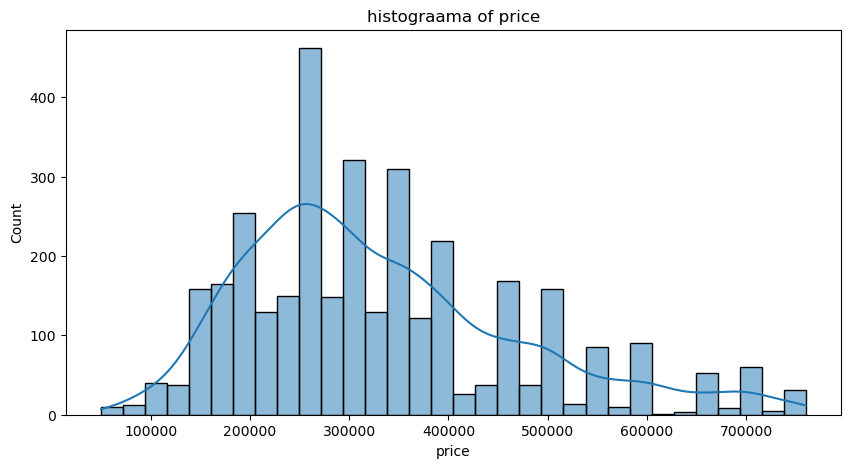

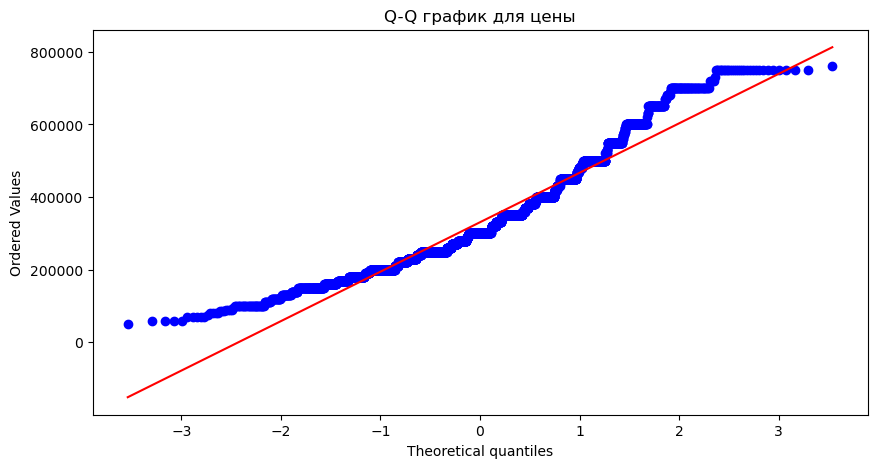

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Гистограмма
plt.figure(figsize=(10, 5))
sns.histplot(df_filter['price'], kde=True)
plt.title("histograama of price")
plt.show()

# Q-Q график
plt.figure(figsize=(10, 5))
stats.probplot(df_filter['price'], dist="norm", plot=plt)
plt.title("Q-Q график для цены")
plt.show()

In [48]:
df_filter.describe()

,price,rooms,area,floor,total_floors,floor_minmax,total_floors_minmax,log_price
count,3455.000000,3455.000000,3455.000000,3455.000000,3455.000000,3455.000000,3455.000000,3455.000000
mean,330708.083647,1.885094,57.094356,4.940955,8.509407,0.137249,0.229984,12.620342
std,140106.732657,0.764246,23.985539,4.015890,5.538397,0.111553,0.149686,0.427875
min,50000.000000,1.000000,11.000000,0.000000,0.000000,0.000000,0.000000,10.819798
25%,230000.000000,1.000000,42.000000,2.000000,5.000000,0.055556,0.135135,12.345839
50%,300000.000000,2.000000,52.000000,4.000000,9.000000,0.111111,0.243243,12.611541
75%,400000.000000,2.000000,68.000000,7.000000,12.000000,0.194444,0.324324,12.899222
max,760000.000000,5.000000,220.000000,29.000000,33.000000,0.805556,0.891892,13.541075


#  Split the Data:


In [61]:
X = df_filter.drop(columns=['main','price','loca','inf','district','floor','total_floors','log_price','rooms'])
Y = df_filter['price']

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from scipy import stats

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, )

In [63]:
X_train

,area,floor_minmax,total_floors_minmax,district_numeric
2468,64,0.111111,0.270270,6
2307,46,0.111111,0.108108,6
1378,43,0.138889,0.135135,6
3275,48,0.027778,0.108108,6
2895,60,0.111111,0.567568,8
...,...,...,...,...
1231,30,0.083333,0.405405,9
1267,49,0.111111,0.135135,7
1443,45,0.444444,0.459459,8
980,67,0.055556,0.324324,10


In [64]:
y_train

2468    270000
2307    250000
1378    400000
3275    270000
2895    550000
         ...  
1231    250000
1267    230000
1443    370000
980     350000
3460    560000
Name: price, Length: 2418, dtype: int64

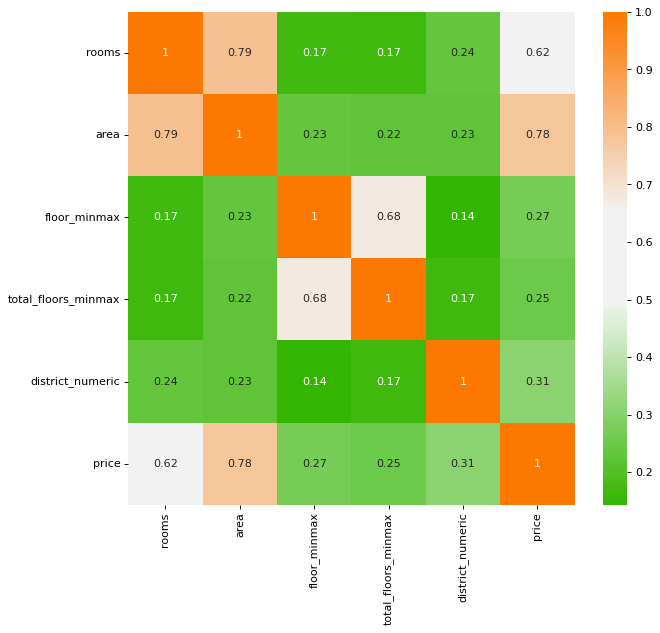

In [43]:
target = 'price'
cmap = sns.diverging_palette(125, 28, s=100, l=65, sep=50, as_cmap=True)
fig, ax = plt.subplots(figsize=(9, 8), dpi=80)
ax = sns.heatmap(pd.concat([X_train, df1[target]],axis=1).corr(), annot=True, cmap=cmap)
plt.show()

# Model Implementation

In [21]:
linear_reg = LinearRegression()

In [65]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [66]:
X_train_scaled

array([[ 0.29024477, -0.23231839,  0.28365519, -0.71957118],
       [-0.45539408, -0.23231839, -0.81609616, -0.71957118],
       [-0.57966722,  0.01580258, -0.63280426, -0.71957118],
       ...,
       [-0.49681846,  2.74513319,  1.56669843,  0.32167545],
       [ 0.41451791, -0.72856032,  0.65023898,  1.36292208],
       [ 0.8701861 ,  0.76016547,  2.66644978,  0.84229876]])

In [73]:
linear_reg.fit(X_train_scaled, y_train)

LinearRegression()

In [68]:
import pandas as pd
import numpy as np

coefficients = np.append(linear_reg.intercept_, linear_reg.coef_)

# Формируем индексы для DataFrame
indices = ['Intercept'] + [col + " Coef." for col in X.columns]

# Создаем DataFrame
coef_df = pd.DataFrame(data=coefficients, index=indices, columns=['Value'])

# Сортируем по значениям
coef_df_sorted = coef_df.sort_values('Value', ascending=False)

# Выводим результат
print(coef_df_sorted)


                                   Value
Intercept                  329570.075682
area Coef.                  76631.589564
district_numeric Coef.      40991.504194
total_floors_minmax Coef.   19921.584867
floor_minmax Coef.          13126.344506


In [74]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

y_pred = linear_reg.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 7795845317.522979


In [70]:
def model_evaluation(linear_reg, X_test, y_test, model_name):
    y_pred = linear_reg.predict(X_test)
    
    MAE = metrics.mean_absolute_error(y_test, y_pred)
    MSE = metrics.mean_squared_error(y_test, y_pred)
    RMSE = np.sqrt(MSE)
    R2_Score = metrics.r2_score(y_test, y_pred)
    
    return pd.DataFrame([MAE, MSE, RMSE, R2_Score], index=['MAE', 'MSE', 'RMSE' ,'R2-Score'], columns=[model_name])

model_evaluation(linear_reg, X_test_scaled, y_test, 'Linear Reg.')

,Linear Reg.
MAE,6.511899e+04
MSE,7.795845e+09
RMSE,8.829408e+04
R2-Score,6.167347e-01


In [71]:
linear_reg.coef_

array([76631.58956408, 13126.34450552, 19921.58486725, 40991.50419437])

In [72]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred1 = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 10515366078.204435


In [75]:
y_test_pred = linear_reg.predict(X_test_scaled)
df_comp = pd.DataFrame({'Actual':y_test, 'Predicted':y_test_pred})

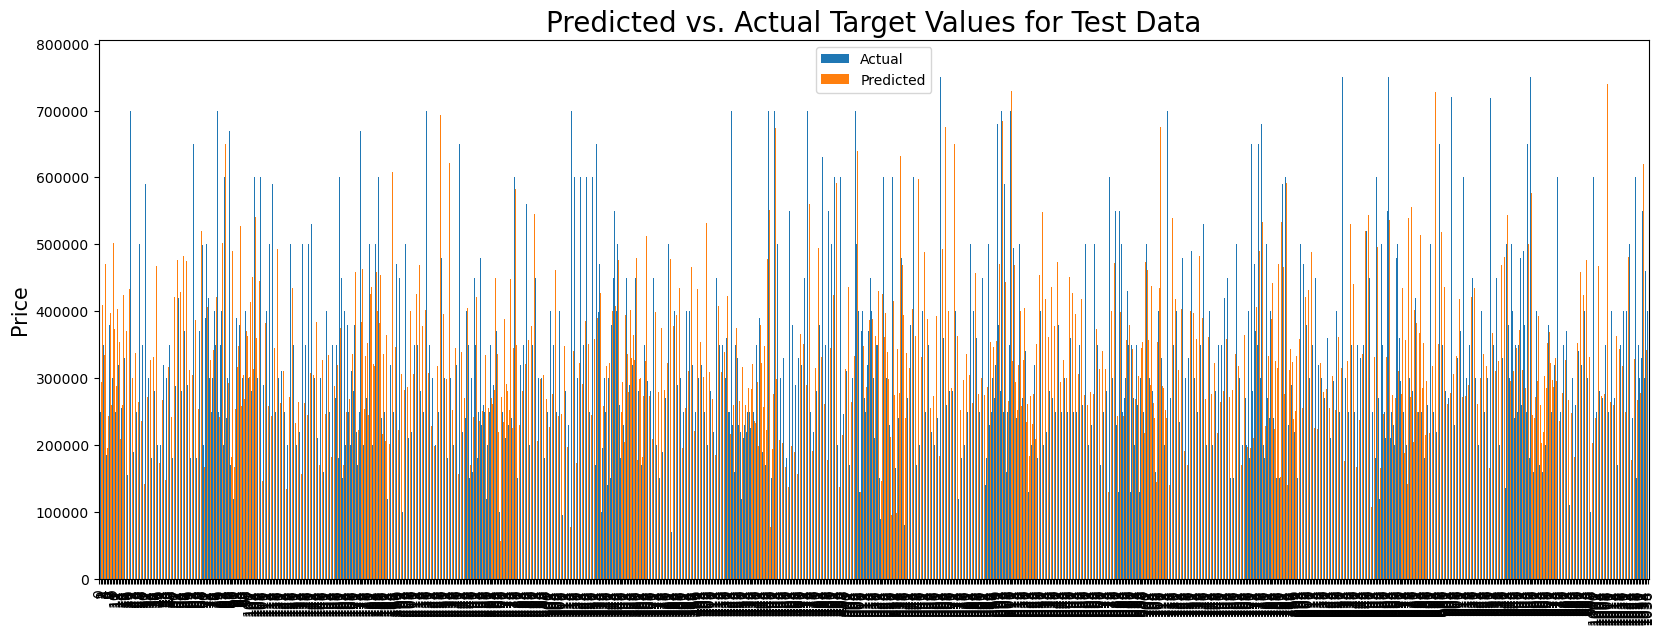

In [76]:
def compare_plot(df_comp):
    df_comp.reset_index(inplace=True)
    df_comp.plot(y=['Actual','Predicted'], kind='bar', figsize=(20,7), width=0.8)
    plt.title('Predicted vs. Actual Target Values for Test Data', fontsize=20)
    plt.ylabel('Price', fontsize=15)
    plt.show()

compare_plot(df_comp)

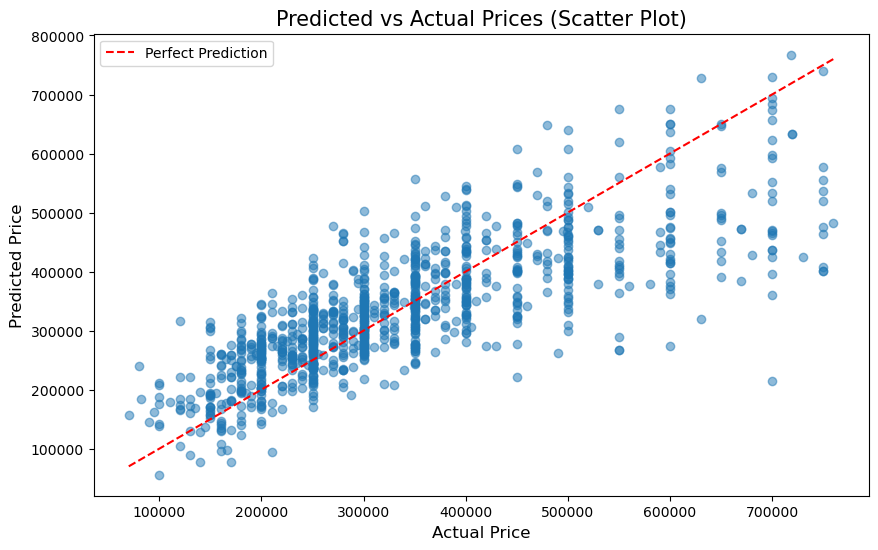

In [77]:
import matplotlib.pyplot as plt

def compare_plot_scatter(df_comp):
    plt.figure(figsize=(10, 6))
    plt.scatter(df_comp['Actual'], df_comp['Predicted'], alpha=0.5)
    plt.plot([df_comp['Actual'].min(), df_comp['Actual'].max()],
             [df_comp['Actual'].min(), df_comp['Actual'].max()], 'r--', label='Perfect Prediction')
    plt.title('Predicted vs Actual Prices (Scatter Plot)', fontsize=15)
    plt.xlabel('Actual Price', fontsize=12)
    plt.ylabel('Predicted Price', fontsize=12)
    plt.legend()
    plt.show()

compare_plot_scatter(df_comp)


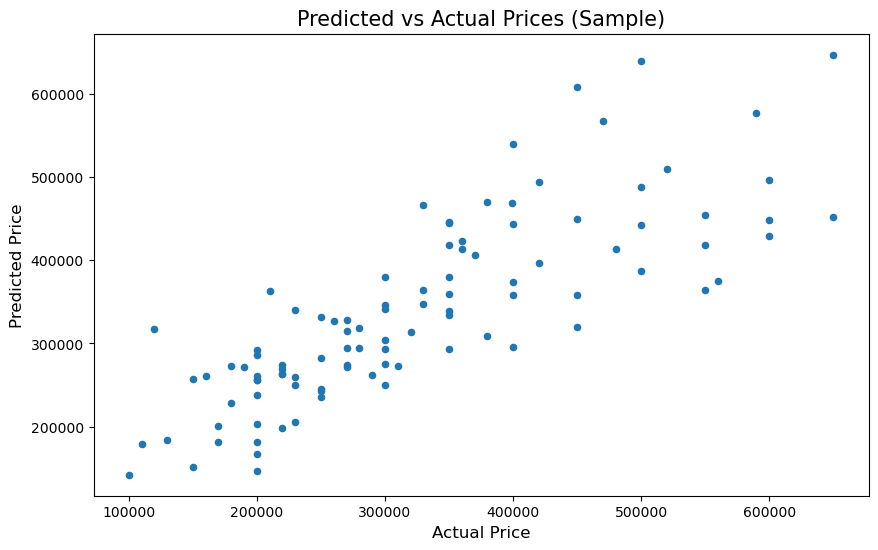

In [79]:
import random

def compare_plot_sample(df_comp):
    # Выбираем случайную подвыборку данных для отображения
    df_sample = df_comp.sample(n=100, random_state=42)
    df_sample.plot(x='Actual', y='Predicted', kind='scatter', figsize=(10, 6))
    plt.title('Predicted vs Actual Prices (Sample)', fontsize=15)
    plt.xlabel('Actual Price', fontsize=12)
    plt.ylabel('Predicted Price', fontsize=12)
    plt.show()

compare_plot_sample(df_comp)
